In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kfu-hw-1-classification-2024/test.tsv
/kaggle/input/kfu-hw-1-classification-2024/train.tsv


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import spacy
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from textblob import TextBlob

In [3]:
test_data = pd.read_csv('/kaggle/input/kfu-hw-1-classification-2024/test.tsv')
train_data = pd.read_csv('/kaggle/input/kfu-hw-1-classification-2024/train.tsv')

train_data.head()

,id,tweet,class
0,760402871867367424,"Настало время для ингаляторов. Дружок, Сальбут...",0
1,1035908416869462016,15) На прошлой зимней олимпиаде большинство лы...,1
2,1089839736427032577,Не соглашусь с заменой ЗОК на метопролол в так...,0
3,779671488748224513,"@di2m1 мезим Смекта Если отравление, то лоперамид",0
4,738309299756240897,Уберите микроволновки и имодиум Действуют соу...,0


**EDA**

In [4]:
train_data['class'].value_counts()

class
0    8683
1     832
Name: count, dtype: int64

In [5]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

id       0
tweet    0
class    0
dtype: int64
id       0
tweet    0
dtype: int64


In [6]:
print(train_data['tweet'].duplicated().sum())

1


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


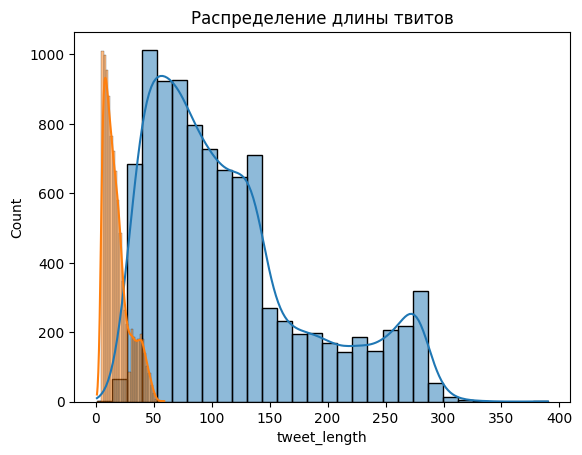

In [7]:
train_data['tweet_length'] = train_data['tweet'].apply(len)
train_data['word_count'] = train_data['tweet'].apply(lambda x: len(x.split()))


sns.histplot(train_data['tweet_length'], kde=True, bins=30)
sns.histplot(train_data['word_count'], kde=True, bins=30)
plt.title("Распределение длины твитов")
plt.show()

Топ-20 слов: [('и', 5216), ('не', 3438), ('в', 3326), ('на', 2356), ('я', 2119), ('что', 1940), ('с', 1826), ('-', 1407), ('а', 1177), ('это', 1064), ('от', 1057), ('как', 1055), ('у', 945), ('мне', 901), ('меня', 885), ('но', 877), ('по', 822), ('Я', 612), ('так', 583), ('за', 567)]


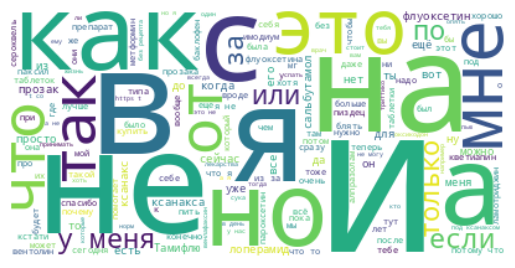

In [8]:
def get_top_n_words(corpus, n=None):
    words = ' '.join(corpus).split()
    return Counter(words).most_common(n)

all_tweets = train_data['tweet']
top_words = get_top_n_words(all_tweets, n=20)
print("Топ-20 слов:", top_words)

wordcloud = WordCloud(background_color='white').generate(' '.join(all_tweets))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
nlp = spacy.load('en_core_web_sm')

def pos_analysis(text):
    doc = nlp(text)
    return [token.pos_ for token in doc]

train_data['pos_tags'] = train_data['tweet'].apply(pos_analysis)

**Feature Engineering**

In [15]:
train_data.head(5)

,id,tweet,class,tweet_length,word_count,pos_tags
0,760402871867367424,"Настало время для ингаляторов. Дружок, Сальбут...",0,59,8,"[PROPN, VERB, PROPN, PROPN, PUNCT, PROPN, PUNC..."
1,1035908416869462016,15) На прошлой зимней олимпиаде большинство лы...,1,276,44,"[X, PUNCT, PROPN, NOUN, PROPN, PROPN, PROPN, P..."
2,1089839736427032577,Не соглашусь с заменой ЗОК на метопролол в так...,0,178,31,"[PROPN, PROPN, PROPN, PROPN, PROPN, PROPN, PRO..."
3,779671488748224513,"@di2m1 мезим Смекта Если отравление, то лоперамид",0,49,7,"[PROPN, ADP, PROPN, PROPN, NOUN, PUNCT, PROPN,..."
4,738309299756240897,Уберите микроволновки и имодиум Действуют соу...,0,52,6,"[PROPN, PROPN, ADJ, ADJ, SPACE, PROPN, NOUN]"


In [18]:
# Text normalization

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [stemmer.stem(word) for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

train_data['cleaned_tweet'] = train_data['tweet'].apply(preprocess_text)

In [ ]:
# Sentiment analysis



df['polarity'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

sns.histplot(df['polarity'], kde=True)
plt.title("Распределение полярности")
plt.show()